In [11]:
import math
import time
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import mlx.core as mx

from main import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
X_train, y_train, X_test, y_test, true_params = load_tanh(ntrain=32, return_params=True)

X_train, y_train, X_test, y_test = map(mx.array, (X_train, y_train, X_test, y_test))

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (32, 2)
Training labels shape:  (32,)
Test data shape:  (8, 2)
Test labels shape:  (8,)


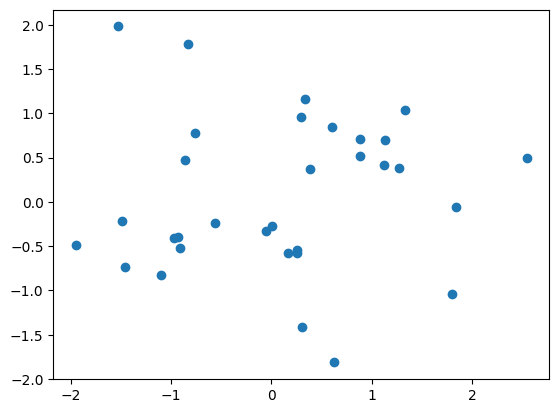

In [13]:
fig, ax = plt.subplots()

xs = X_train[:, 0]
ys = X_train[:, 1]

ax.scatter(xs, ys)

In [14]:
# TODO: Prepro, split into validation

In [20]:
lr = 1e-2
input_dim = X_train.shape[-1]
hidden_dim = 1
nstep = 10_000

def forward(params, X):
    return mx.tanh(X @ params)

params = rnncellnew(input_dim, hidden_dim)
fwd = rnncellfwd
# params = 1e-2 * mx.random.normal(shape=(input_dim, 1))
# fwd = forward

model = (fwd, params)

sgd = sgdnew(lr=lr)

tic = time.perf_counter_ns()
trained_params, metrics = sgdsolve(sgd, model, X_train, y_train, nstep=nstep, print_every=100)
toc = time.perf_counter_ns()

dt = toc - tic
print(f"Untrained parameters: {params}")
print(f"Trained parameters: {trained_params}")
print(f"True parameters: {mx.array(true_params)}")
print(f"Error norm: {(mx.array(true_params) - trained_params['wx']).square().sum():.10f}")
print(f"Training time (ns): {dt}")
print(f"Throughput (ns/it): {dt/nstep}")

step: 0 | loss: 0.52622 | dt: 1228958ns
step: 100 | loss: 0.05109 | dt: 1109208ns
step: 200 | loss: 0.01928 | dt: 257417ns
step: 300 | loss: 0.00985 | dt: 278459ns
step: 400 | loss: 0.00576 | dt: 296667ns
step: 500 | loss: 0.00363 | dt: 278542ns
step: 600 | loss: 0.00240 | dt: 308167ns
step: 700 | loss: 0.00164 | dt: 316208ns
step: 800 | loss: 0.00115 | dt: 306166ns
step: 900 | loss: 0.00083 | dt: 328833ns
step: 1000 | loss: 0.00060 | dt: 292250ns
step: 1100 | loss: 0.00044 | dt: 324125ns
step: 1200 | loss: 0.00033 | dt: 322416ns
step: 1300 | loss: 0.00025 | dt: 306708ns
step: 1400 | loss: 0.00019 | dt: 255875ns
step: 1500 | loss: 0.00015 | dt: 317041ns
step: 1600 | loss: 0.00011 | dt: 293083ns
step: 1700 | loss: 0.00009 | dt: 254959ns
step: 1800 | loss: 0.00007 | dt: 231750ns
step: 1900 | loss: 0.00006 | dt: 221250ns
step: 2000 | loss: 0.00005 | dt: 227750ns
step: 2100 | loss: 0.00004 | dt: 214375ns
step: 2200 | loss: 0.00003 | dt: 236417ns
step: 2300 | loss: 0.00003 | dt: 221916ns
st